# Create Data Vector: From Cosmosis Datablock

To validate and test the y3 cluster pipeline we make a simplified mock data where they are an output for a fixed cosmology and mor.

In [1]:
#!/usr/bin/env python
import os

import sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.io.fits import getdata
from astropy.table import Table
from scipy.interpolate import interp1d

In [2]:
import matplotlib
matplotlib.rc('xtick', labelsize=20, top=True, direction='in')
matplotlib.rc('ytick', labelsize=20, right=True, direction='in')
matplotlib.rc('axes', linewidth=1, labelsize=20)
matplotlib.rc('xtick.major', size=5)
#matplotlib.rc('xtick.minor', size=5)
matplotlib.rc('ytick.major', size=5)
#matplotlib.rc('ytick.minor', size=5)

In [3]:
import os
pwd = os.getcwd()
repo_dir = pwd.split('mocks')[0]
data_dir = pwd.split('notebooks')[0]
print('Current working directory: %s'%pwd)
print('Repo dir: %s'%repo_dir)

Current working directory: /global/cfs/cdirs/des/jesteves/codes/fnalFall2022/mocks/mock/notebooks
Repo dir: /global/cfs/cdirs/des/jesteves/codes/fnalFall2022/


In [4]:
def get_block(model,col,dtype=None):
    return np.genfromtxt(root+'%s/%s.txt'%(model.lower(), col),dtype=dtype)

root = '%sbaseline_data/'%data_dir
print(root)

/global/cfs/cdirs/des/jesteves/codes/fnalFall2022/mocks/mock/baseline_data/


In [5]:
zbins = np.array([0.2,0.35,0.5,0.65])
zmed = 0.5*(zbins[1:]+zbins[:-1])

label_zbins = ['%.2f < z < %.2f'%(zl,zh) for zl, zh in zip(zbins[:-1],zbins[1:])]
label_zbins

['0.20 < z < 0.35', '0.35 < z < 0.50', '0.50 < z < 0.65']

In [6]:
lambda_bins2 = np.array([20,30,45,60,200])
lambda_med = 0.5*(lambda_bins2[1:]+lambda_bins2[:-1])

lambda_bins = np.array([20,30,45,60,1000])

## Number Counts

In [7]:
## initialize data vector and covariance dict
dictData = dict()
dictCov = dict()

In [8]:
## read datablock output
gridpoints = get_block("numbercounts","gridpoints")
status = get_block("numbercounts", "status")
ncvals = get_block("numbercounts", "vals")

In [9]:
print(ncvals)

[[2067.15671094 3765.48239895 4456.27117535]
 [1038.771178   1813.84815622 2051.22176015]
 [ 382.78495718  636.65390298  682.84455674]
 [ 396.41943404  597.4206915   579.30440128]]


In [10]:
nccov = np.genfromtxt(data_dir+'covariance/cov_nc_matteo_12x12_May2023.txt')
print('Shape',nccov.shape)
print('First line',np.round(nccov[0],4))

Shape (12, 12)
First line [3396.8459 1384.358   519.2267  488.2327  -96.6616  -52.4982  -18.7771
  -16.0484  -49.005   -25.5963   -8.7439   -6.7717]


In [11]:
numberCounts = ncvals#dictData['NC']

In [12]:
diag_cov = ( np.diag(nccov) ).reshape(3,4)

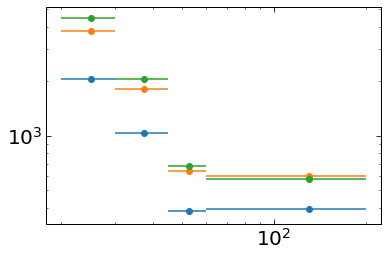

In [13]:
# def plot_number_counts()
nc = numberCounts.T
plt.loglog()
for ix in range(3):
    plt.errorbar(lambda_med,nc[ix],xerr=np.diff(lambda_bins2)/2.,yerr=np.sqrt(diag_cov[ix]), fmt='o')

In [14]:
np.sqrt(diag_cov[ix])

array([69.20129718, 39.52891278, 17.44425534, 13.48751865])

In [15]:
dictData['NC'] = ncvals.flatten()
dictCov['NC'] = nccov

## $\gamma_T$ Profiles

In [16]:
kw = {
    'LogMass': r'log(M_{200c})',
    'R': r'$R$ [Mpc]',
    'DSigma': r'$\Delta \Sigma \;\; [M_{\odot}/pc^2]$',
    'Shear': r'\gamma_{T} \;'
}

In [17]:
!ls /global/cfs/cdirs/des/jesteves/codes/fnalFall2022/mocks/mock/baseline_data/shear/

r.txt  shear_cen.txt  theta.txt


In [18]:
_shear = get_block("shear", "shear_cen")
radii = get_block("shear", "r")
status = get_block("kappa", "status")#.astype(int)

# reshape
shear = _shear.reshape(4,3,radii.size)

In [19]:
SCinv = get_block("sigmacritinv","sigma_crit_inv")[:,0]
zsc = get_block("sigmacritinv","z")

zbins = np.array([0.2,0.35,0.5,0.65])
zmed = 0.5*(zbins[1:]+zbins[:-1])
sigma_crit_inv = np.interp(zmed,zsc, SCinv)
dSigma = shear/sigma_crit_inv[np.newaxis,:,np.newaxis]

In [20]:
ls /global/common/software/des/zchusre/cluster-lensing-cov/notebooks | head

des_y1/
des_y1.ipynb
des_y1_z_0.2_0.35_lam_120_400/
des_y1_z_0.2_0.35_lam_120_400DeltaSigma_cov_combined.dat
des_y1_z_0.2_0.35_lam_120_400DeltaSigma_cov_cosmic_shear.dat
des_y1_z_0.2_0.35_lam_120_400DeltaSigma_cov_shape_noise.dat
des_y1_z_0.2_0.35_lam_120_400rp_hiMpc.dat
des_y1_z_0.2_0.35_lam_20_30/
des_y1_z_0.2_0.35_lam_20_30DeltaSigma_cov_combined.dat
des_y1_z_0.2_0.35_lam_20_30DeltaSigma_cov_cosmic_shear.dat


In [21]:
# get covariance
def get_cov(il,iz):
    return np.genfromtxt(fname_base.format(zbins[iz],zbins[1+iz],lambda_bins[il],lambda_bins[il+1]))

cov_path = '/global/common/software/des/zchusre/cluster-lensing-cov/notebooks/'
fname_base = cov_path+'des_y1_z_{}_{}_lam_{}_{}DeltaSigma_cov_combined.dat'
rvec = np.genfromtxt(cov_path+'des_y1_z_0.2_0.35_lam_120_400rp_hiMpc.dat')
rvec

array([[0.3     , 0.345314, 0.32186 ],
       [0.345314, 0.397472, 0.370476],
       [0.397472, 0.457508, 0.426435],
       [0.457508, 0.526612, 0.490845],
       [0.526612, 0.606155, 0.564985],
       [0.606155, 0.697711, 0.650324],
       [0.697711, 0.803098, 0.748552],
       [0.803098, 0.924402, 0.861618],
       [0.924402, 1.06403 , 0.991761],
       [1.06403 , 1.22474 , 1.14156 ],
       [1.22474 , 1.40974 , 1.31399 ],
       [1.40974 , 1.62267 , 1.51246 ],
       [1.62267 , 1.86777 , 1.74091 ],
       [1.86777 , 2.14989 , 2.00387 ],
       [2.14989 , 2.47462 , 2.30654 ],
       [2.47462 , 2.8484  , 2.65494 ],
       [2.8484  , 3.27863 , 3.05595 ],
       [3.27863 , 3.77385 , 3.51754 ],
       [3.77385 , 4.34388 , 4.04885 ],
       [4.34388 , 5.      , 4.66041 ]])

In [22]:
jk_path = "/global/cfs/cdirs/des/jesteves/data/boost_factor/y1/profiles"
fname_jk_base = jk_path+"/full-unblind-v2-mcal-zmix_y1subtr_l{l}_z{z}_dst_cov.dat"
fname_y1_ds = jk_path+"/full-unblind-v2-mcal-zmix_y1subtr_l{l}_z{z}_profile.dat"
radii_jk,_,_,_,_ =np.genfromtxt(fname_y1_ds.format(l = 0, z = 0),unpack=True)

def get_jk_cov(il,iz):
    return np.genfromtxt(fname_jk_base.format(l = il, z = iz))

/tmp/ipykernel_128303/3437414762.py:3: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(cov),cmap='RdBu',origin='lower')


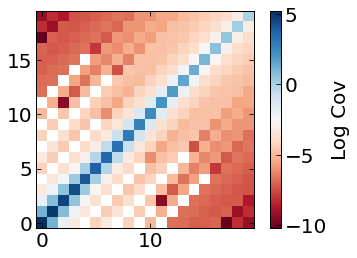

In [23]:
cov = get_cov(3,2)
jk_cov = get_jk_cov(3,2)
plt.imshow(np.log(cov),cmap='RdBu',origin='lower')
plt.colorbar().set_label('Log Cov')

In [24]:
from colossus.cosmology import cosmology
from colossus.halo import profile_nfw
from scipy.optimize import curve_fit

h0=0.7
params = {'flat': True, 'H0': 100*h0, 'Om0': 0.3, 'Ob0': 0.045, 'sigma8': 0.83, 'ns': 0.96}
cosmology.addCosmology('myCosmo', **params)
cosmocol = cosmology.setCosmology('myCosmo')

def duffy_concentration_relation(m_h, z_eff=0.4):
    a_eff = 1/(1+z_eff)
    m_h_pivot = 2e12
    return 7.85*np.power(m_h/m_h_pivot,-0.081)*np.power(a_eff,0.71)

def fit_mass(radii, lgM):
    c = duffy_concentration_relation(10**lgM)
    return np.log(profile_nfw.NFWProfile(M = 10**(lgM), c = c, z = 0, mdef = 'vir').deltaSigma(1e3*radii)/(1e3**2))

def plot_fit(radii, dsigma, **kwargs):
    pars, _ = curve_fit(fit_mass, radii, np.log(dsigma), p0=[np.log10(3e14)])
    nfw = np.exp(fit_mass(radii, pars[0]))
    plt.plot(radii, nfw, **kwargs)
    print('Fitted log mass: %.2f'%pars[0])

Redshift Bin 0
Fitted log mass: 14.36
Fitted log mass: 14.60
Fitted log mass: 14.80
Fitted log mass: 15.09

Redshift Bin 1
Fitted log mass: 14.34
Fitted log mass: 14.58
Fitted log mass: 14.78
Fitted log mass: 15.06

Redshift Bin 2
Fitted log mass: 14.39
Fitted log mass: 14.62
Fitted log mass: 14.83
Fitted log mass: 15.09



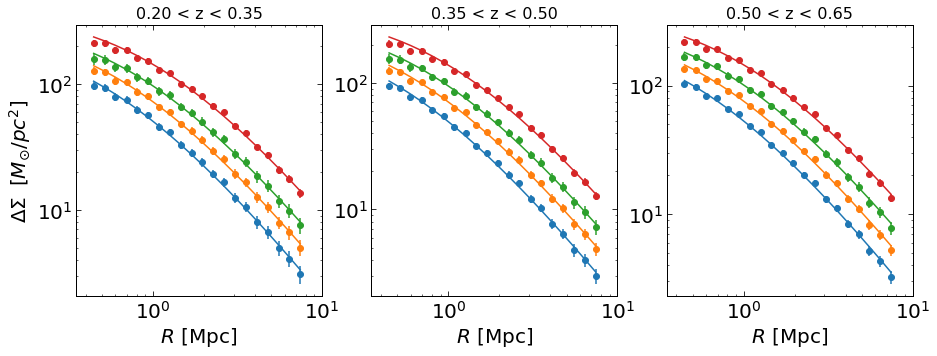

In [25]:
# print('Fixed Concentration 4')
plt.figure(figsize=(15,5))


for iz in range(3):
    print('Redshift Bin %i'%iz)
    plt.subplot(1,3,iz+1)
    plt.loglog()
    for i in range(4):
        #plt.scatter(radii, dSigma[i,iz,:])
        p = plt.errorbar(radii, dSigma[i,iz,:],yerr=np.sqrt(np.diag(get_cov(i,iz))),fmt='o')
        color = p[0].get_color()
        plot_fit(radii, dSigma[i,iz,:], color=color)
    plt.xlim(0.35,10.)
    plt.xlabel(kw['R'])
    plt.title(label_zbins[iz], fontsize=16)
    if iz==0: 
        plt.ylabel(kw['DSigma'])
        #plt.legend()
    print()


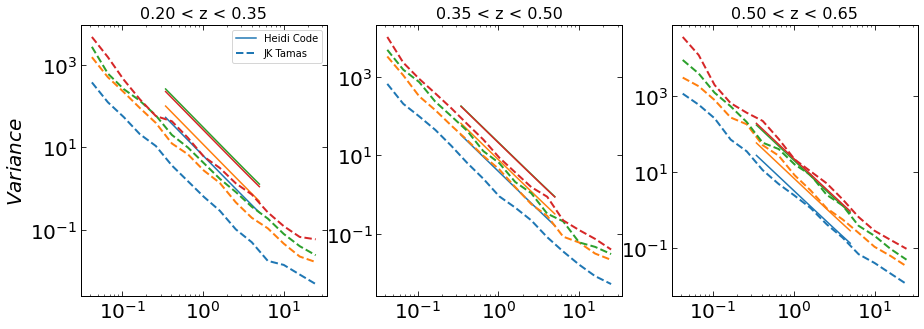

In [26]:
# print('Fixed Concentration 4')
plt.figure(figsize=(15,5))
for iz in range(3):
    plt.subplot(1,3,iz+1)
    # plt.yscale('log')
    plt.loglog()
    for i in range(4):
        #plt.scatter(radii, dSigma[i,iz,:])
        p = plt.plot(rvec.T[1], np.diag(get_cov(i,iz)),label='Heidi Code')
        p = plt.plot(radii_jk, np.diag(get_jk_cov(i,iz)),color=p[0].get_color(),ls='--',lw=2,label='JK Tamas')
        if (iz==0)&(i==0): 
            plt.ylabel(r'$Variance$')
            plt.legend()

    plt.title(label_zbins[iz], fontsize=16)

In [27]:
covariances = []
means = []
for il in range(4):
    for iz in range(3):
        covariances.append(get_cov(il,iz))
        means.append(dSigma[il][iz])

In [28]:
from scipy import linalg

dictData['Shear'] = np.stack(means).flatten()
dictCov['Shear'] = linalg.block_diag(*covariances)

## Write Datavector Out

In [29]:
import sys

sys.path.append('/global/cfs/cdirs/des/jesteves/codes/fnalFall2022/')

In [30]:
from fileLoc import FileLocs

floc = FileLocs(machine='nersc')
print('halo file name: %s'%floc.dataVector_mock_fname)

halo file name: /global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/dataVec_mock_May10th2023.hdf5


In [31]:
import h5py

fname = floc.dataVector_mock_fname

with h5py.File(fname, "w") as f:
    f.create_group("data")
    f.create_group("cov")
    f.create_group("invcov")
    
    f["data"].create_dataset("NC", data=dictData['NC'],dtype='i')
    f["cov"].create_dataset("NC", data=dictCov['NC'])
    f["invcov"].create_dataset("NC", data=np.linalg.inv(dictCov['NC']))
    
    f["data"].create_dataset("Shear", data=dictData['Shear'])
    f["cov"].create_dataset("Shear", data=dictCov['Shear'])
    f["invcov"].create_dataset("Shear", data=np.linalg.inv(dictCov['Shear']))
    
    # f["data"].create_dataset("Wp", data=dictData['Wp'])
    # f["cov"].create_dataset("Wp", data=dictCov['Wp'])
    # f["invcov"].create_dataset("Wp", data=np.linalg.inv(dictCov['Wp']))

print('Saved file: %s'%fname)

Saved file: /global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/dataVec_mock_May10th2023.hdf5


In [43]:
file_data = '/global/cfs/cdirs/des/jesteves/data/buzzard/v1.9.8/y3_rm/dataVec_mock_May10th2023.npz'
np.savez(file_data,
        data_NC=dictData['NC'],
        data_Shear=dictData['Shear'],
        invcov_NC=np.linalg.inv(dictCov['NC']),
        invcov_Shear=np.linalg.inv(dictCov['Shear']))

In [41]:
# np.load(file_data)['inv_cov_Shear'].shape

In [44]:
print('Size',dictData['NC'].size)
print('nan',np.count_nonzero(np.isnan(np.linalg.inv(dictCov['NC']))))
print('inf',np.count_nonzero(np.isinf(np.linalg.inv(dictCov['NC']))))

Size 12
nan 0
inf 0


In [45]:
print('Size',dictData['Shear'].size)
print('nan',np.count_nonzero(np.isnan(np.linalg.inv(dictCov['Shear']))))
print('inf',np.count_nonzero(np.isinf(np.linalg.inv(dictCov['Shear']))))

Size 240
nan 0
inf 0


In [46]:
12500/3600

3.4722222222222223